In [53]:
# Importing standard packages
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
from textwrap import fill 

from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, GridSearchCV
import warnings
import math
warnings.filterwarnings("ignore")

# from sklearn.pipeline import Pipeline

#classification models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm

# classification metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# scalers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer, label_binarize

# dummies
from sklearn.preprocessing import OneHotEncoder

# NLP libraries
from nltk.corpus import stopwords, wordnet
import string
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer, word_tokenize
import re
from nltk import FreqDist
from nltk import pos_tag
from wordcloud import WordCloud 

# imbalanced-learn
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

## **3.3 EDA**

### **3.3.3 Frequency Distribution of the Most Common word in the Dataset**


Frequency Distribution of most common words (Negative, Neutral and Positive)

In [54]:
# loading the dataset
sentiment_data = pd.read_csv("../data/cleaned_sentiment_data.csv", encoding="ISO-8859-1")
sentiment_data

# drop the irrelevant label and check the remaining labels
sentiment_data = sentiment_data.query('sentiment != "irrelevant"')

#confirm removal of the label
sentiment_data["sentiment"].value_counts()

# convert sentiment column to integer
sentiment_data["sentiment"] = sentiment_data["sentiment"].astype(int)

# checking the data types
sentiment_data.info()

# negative words
negative_words = ' '.join(sentiment_data.query("sentiment==1")['cleaned_text'])

# positive words
positive_words = ' '.join(sentiment_data.query("sentiment==3")['cleaned_text'])

# neutral/no-emotion words
neutral_words = ' '.join(sentiment_data.query("sentiment==5")['cleaned_text'])

<class 'pandas.core.frame.DataFrame'>
Index: 8914 entries, 0 to 9069
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          8914 non-null   object
 1   sentiment     8914 non-null   int64 
 2   cleaned_text  8914 non-null   object
dtypes: int64(1), object(2)
memory usage: 278.6+ KB


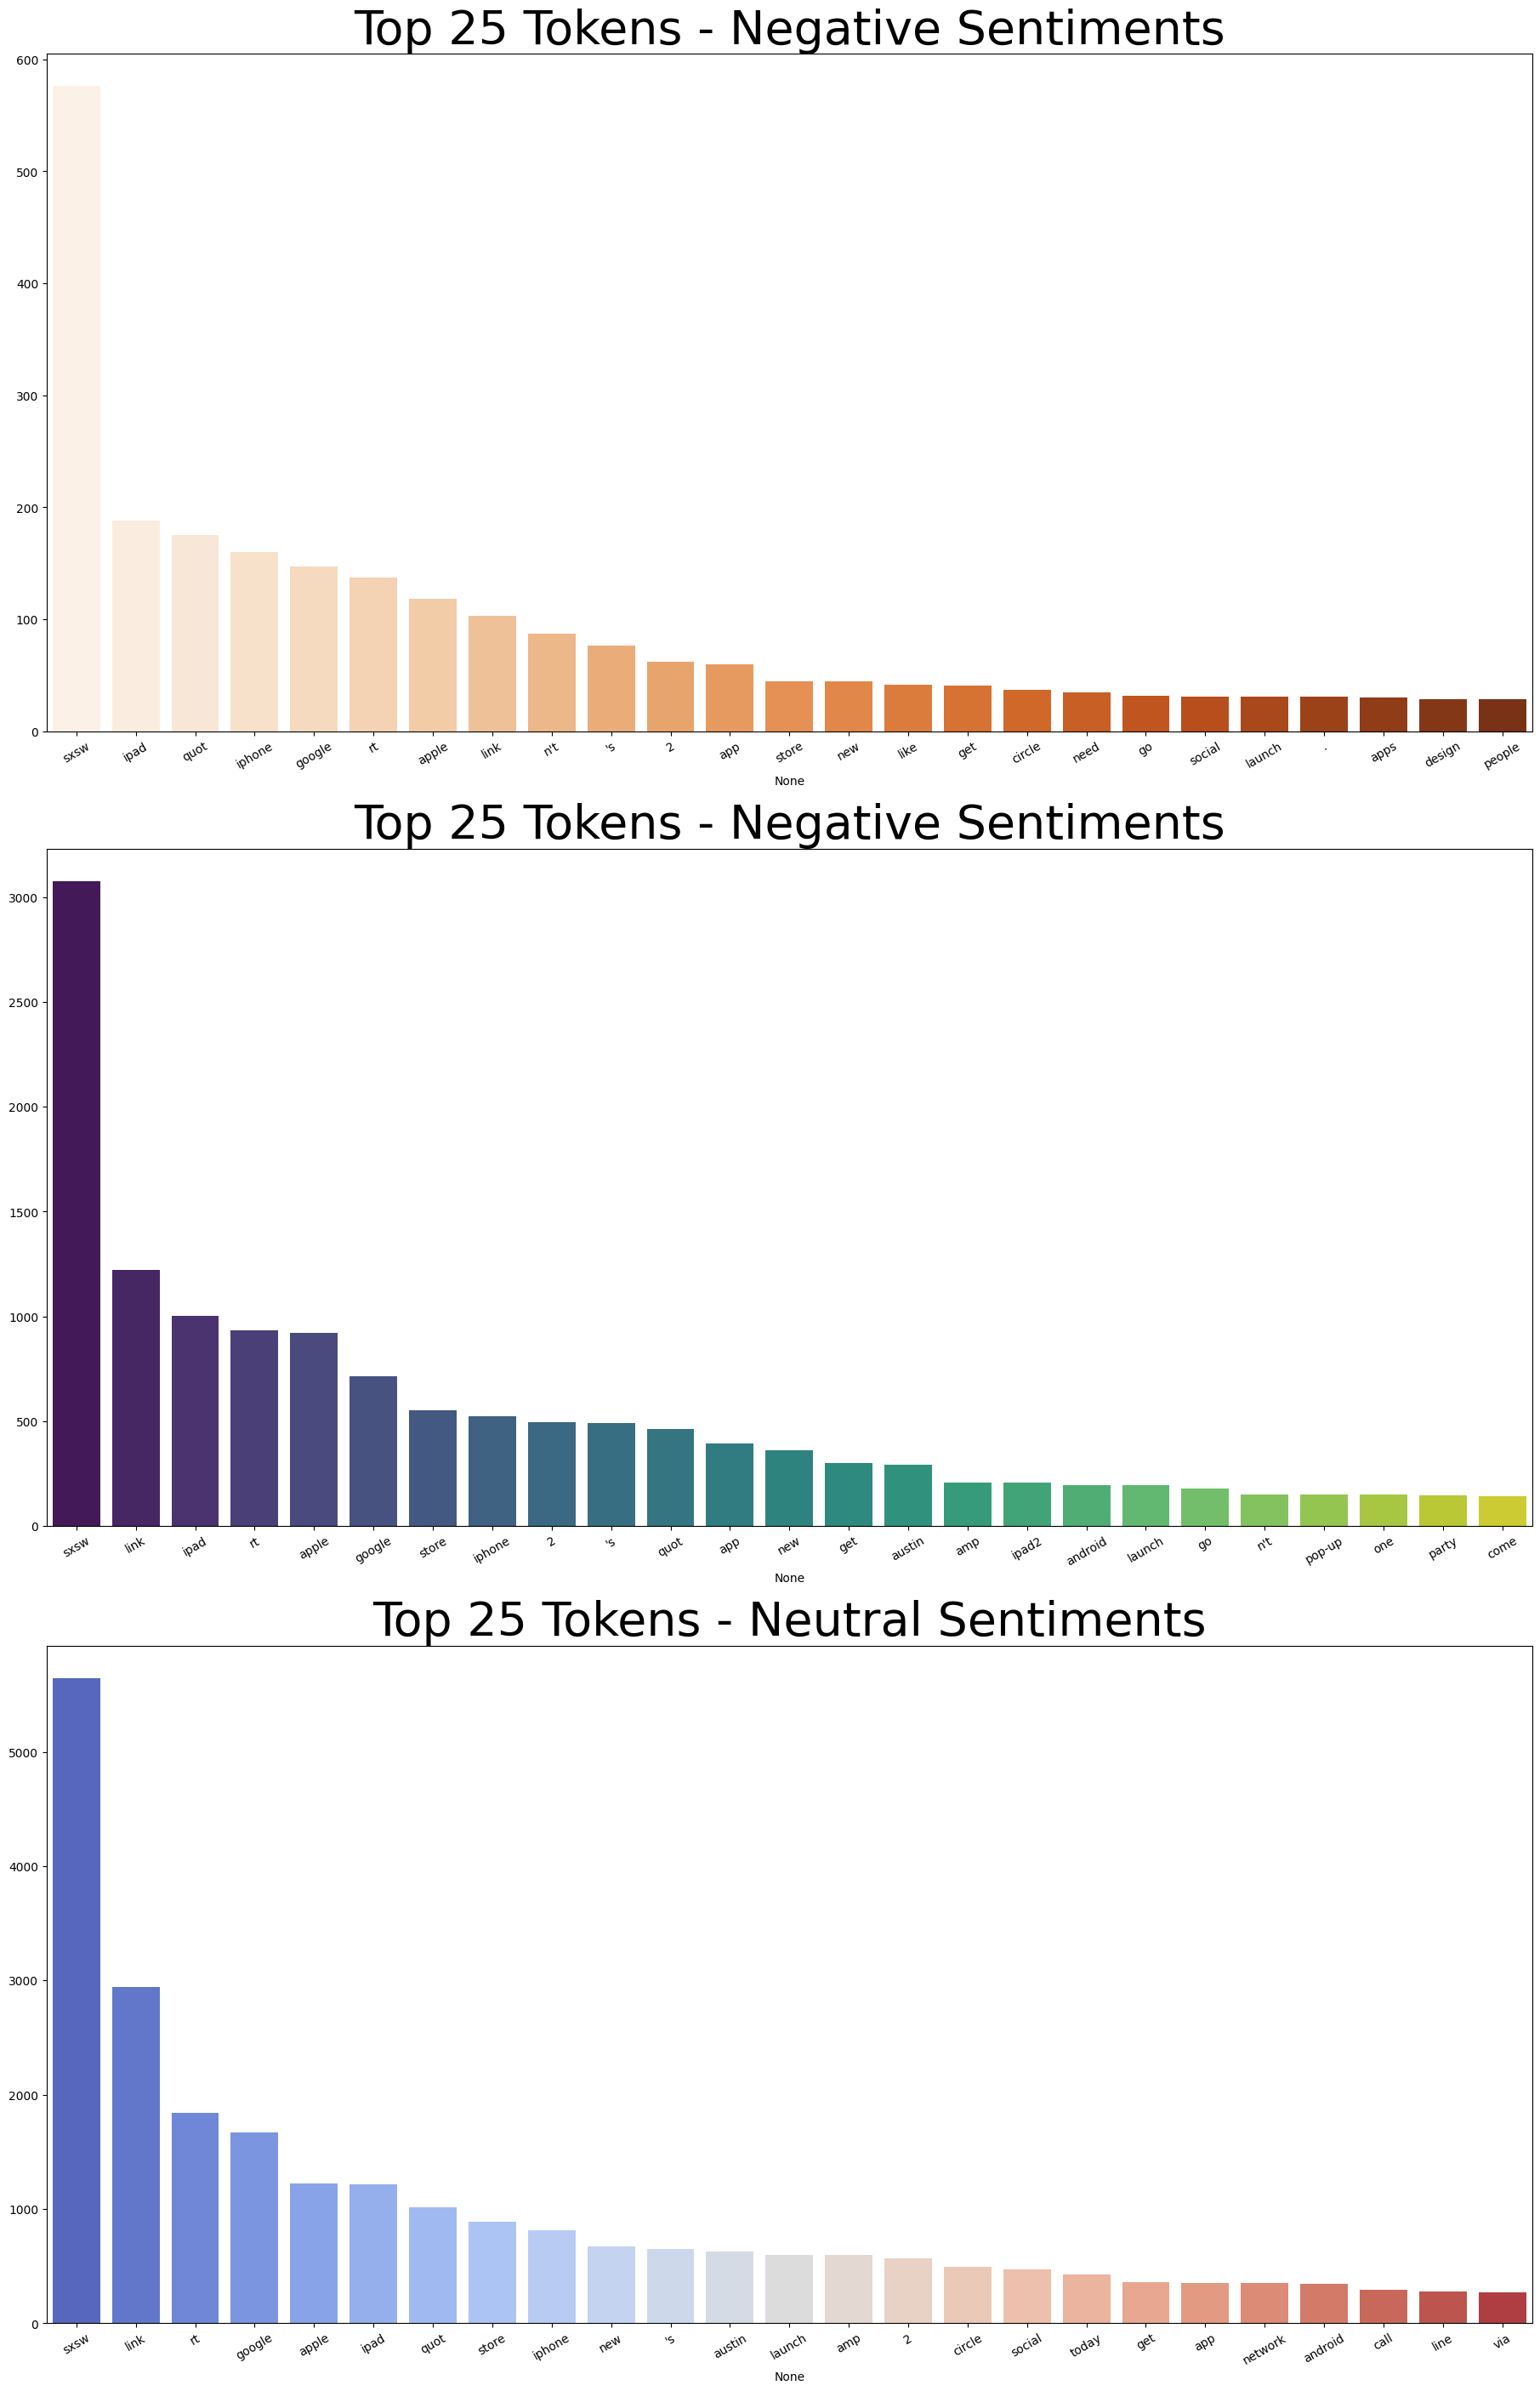

In [55]:
#create subplots
fig,axes = plt.subplots(3,1, figsize = (18, 28), constrained_layout = True)
axes = axes.flatten()

# define colormaps
colormaps = ["Oranges", "viridis", "coolwarm"]

# creating Freqdist for whole Bow, keeping the 25 most common tokens
neg_tokens = word_tokenize(negative_words) # tokenize negative words

#frequency distriution for top 25 tokens
all_fdist_neg = FreqDist(neg_tokens).most_common(25)

all_fdist_neg = pd.Series(dict(all_fdist_neg)) #conversion to panda series for ease of plotting

#bar plot on first subplot
colors = sns.color_palette(colormaps[0], len(all_fdist_neg))
sns.barplot(
    x=all_fdist_neg.index, 
    y=all_fdist_neg.values,
    ax=axes[0],
    palette=colors)
axes[0].set_title("Top 25 Tokens - Negative Sentiments", fontsize = 40)
axes[0].tick_params(axis='x', rotation=30)
fig.savefig("../images/top25_negative_words.jpeg", format="jpeg", dpi=300)


# creating Freqdist for whole Bow, keeping the 25 most common tokens
pos_tokens = word_tokenize(positive_words) # tokenize negative words

#frequency distriution for top 25 tokens
all_fdist_pos = FreqDist(pos_tokens).most_common(25)

all_fdist_pos = pd.Series(dict(all_fdist_pos)) #conversion to panda series for ease of plotting

#bar plot on second subplot
colors = sns.color_palette(colormaps[1], len(all_fdist_pos))
sns.barplot(
    x=all_fdist_pos.index, 
    y=all_fdist_pos.values,
    ax=axes[1],
    palette=colors)
axes[1].set_title("Top 25 Tokens - Negative Sentiments", fontsize = 40)
axes[1].tick_params(axis='x', rotation=30)
fig.savefig("../images/top25_positive_words.jpeg", format="jpeg", dpi=300)


# creating Freqdist for whole Bow, keeping the 25 most common tokens
neu_tokens = word_tokenize(neutral_words) # tokenize negative words

#frequency distriution for top 25 tokens
all_fdist_neu = FreqDist(neu_tokens).most_common(25)

all_fdist_neu = pd.Series(dict(all_fdist_neu)) #conversion to panda series for ease of plotting

#bar plot on third subplot
colors = sns.color_palette(colormaps[2], len(all_fdist_neu))
sns.barplot(
    x=all_fdist_neu.index, 
    y=all_fdist_neu.values,
    ax=axes[2],
    palette=colors)
axes[2].set_title("Top 25 Tokens - Neutral Sentiments", fontsize = 40)
axes[2].tick_params(axis='x', rotation=30)
fig.savefig("../images/top25_neutral_words.jpeg", format="jpeg", dpi=300)

plt.show()